# Two-sample t test #

# In brevi #

A two-sample t test answers these questions:

1. Is the average of a sample from process 1 different from the average of a sample from process 2?
2. Is the average of a sample from process 1 greater than the average of a sample from process 2?
3. Is the average of a sample from process 1 less than the average of a sample from process 2?
4. Is the average of a sample from process 1 different from the average of a sample from process 2 by a predetermined amount?

# Contents #

- [Assumptions](#assumptions)
- [Data](#data)
- [How to use this notebook](#how-to-use-this-notebook)
- [Quick-and-dirty](#quick-and-dirty)
- [Graphical analyses](#graphical-analyses)
- [Descriptive statistics](#descriptive-statistics)
- [Hypothesis test method](#hypothesis-test-method)
- [Confidence interval method](#confidence-interval-method)
- [References](#references)
- [Support](#support)

# <a id='assumptions'></a> Assumptions #

- The data are continuous ([interval](https://en.wikipedia.org/wiki/Level_of_measurement#Interval_scale) or [ratio](https://en.wikipedia.org/wiki/Level_of_measurement#Ratio_scale) scales).
- The data in each sample follow a [normal distribution](https://en.wikipedia.org/wiki/Normal_distribution) with mean $\mu$ and variance $\sigma^2$.
- The sample variances $s^2$ follow a $\chi^2$ distribution with $\rho$ degrees of freedom under the null hypothesis, where $\rho$ is a positive constant.
- $(\overline{Y} - \mu)$ and the sample standard deviations $s$ are independent.
- The size of each sample may be equal or unequal.
- The variance of each sample may be equal or unequal.
- The data should be sampled independently from the two populations being compared.

# <a id='assumptions'></a> Data #

Download the data file:

[data_two_sample_t.csv](https://drive.google.com/open?id=0BzrdQfHR2I5DeWlITmM3WHVmU2M)

# <a id='how-to-use-this-notebook'></a> How to use this notebook #

1. Edit the test parameters.
2. Create a data file.
3. Recalculate all “In” cells.

In [1]:
import pandas as pd
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from IPython.display import display_html

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

## Edit the test parameters ##

Change the following parameter to suit your analysis:

- signficance_level
- hypothesized_difference

In [2]:
significance_level = 0.05
hypothesized_difference = 4

## Create a data file ##

- There must be two columns:
    - The **x** column contains the sample identifier (1, 2).
    - The **y** column contains the data values.
- The **x** label is lower case.
- The **y** label is lower case.
- Save it as CSV (comma-separated values) with the name **data_two_sample_t.csv**.
- Put it in the same directory as this notebook.

In [3]:
# A csv data file should be utf-8 encoded.
# If so, it does not require a utf-8 declaration.
# df = pd.read_csv('data_filename.csv', encoding='utf-16')
df = pd.read_csv('data_two_sample_t.csv')
#sample_one = df['y'][df['x'] == 1]
sample_one = df[df['x'] == 1]
#sample_two = df['y'][df['x'] == 2]
sample_two = df[df['x'] == 2]

# <a id='descriptive-statistics'></a> Descriptive statistics #

## Sample one ##

In [4]:
n_sample_one = sample_one['y'].size
print('Count =', n_sample_one)
average_sample_one = sample_one['y'].mean()
print('Average =', average_sample_one)
median_sample_one = sample_one['y'].median()
print('Median =', median_sample_one)
standard_deviation_sample_one = sample_one['y'].std(ddof=1)
print('Sample standard deviation =', standard_deviation_sample_one)
variance_sample_one = sample_one['y'].var(ddof=1)
print('Variance =', variance_sample_one)
standard_error_mean_sample_one = standard_deviation_sample_one/np.sqrt(n_sample_one)
print('Standard error of the mean =', standard_error_mean_sample_one)

Count = 11
Average = 36.0909090909
Median = 35.0
Sample standard deviation = 4.90824908607
Variance = 24.0909090909
Standard error of the mean = 1.47989278146


## Sample two ##

In [5]:
n_sample_two = sample_two['y'].size
print('Count =', n_sample_two)
average_sample_two = sample_two['y'].mean()
print('Average =', average_sample_two)
median_sample_two = sample_two['y'].median()
print('Median =', median_sample_two)
standard_deviation_sample_two = sample_two['y'].std(ddof=1)
print('Sample standard deviation =', standard_deviation_sample_two)
variance_sample_two = sample_two['y'].var(ddof=1)
print('Variance =', variance_sample_two)
standard_error_mean_sample_two = standard_deviation_sample_two/np.sqrt(n_sample_two)
print('Standard error of the mean =', standard_error_mean_sample_two)

Count = 9
Average = 32.2222222222
Median = 31.0
Sample standard deviation = 2.53859103529
Variance = 6.44444444444
Standard error of the mean = 0.846197011763


# <a id='quick-and-dirty'></a> Quick-and-dirty #

Here is the minimal code to do a two-sample t test.

## Scenario 1 ##

Is the average of a sample from process 1 different from the average of a sample from process 2?

H<sub>o</sub>: $\mu_1$ = $\mu_2$ The average of process 1 equals the average of process 2.<br />
H<sub>a</sub>: $\mu_1$ ≠ $\mu_2$ The average of process 1 does not equal the average of process 2.<br />

### Equal variances ###

In [6]:
test_result = stats.ttest_ind(sample_one['y'], 
                              sample_two['y'], 
                              equal_var=True)
if test_result.pvalue < significance_level:
    print('statistically significant')
    print('test statistic',
          test_result.statistic.round(3),
          sep=' = ')
    print('p value',
          test_result.pvalue.round(3),
          sep=' = ')
else:
    print('not statistically significant')
    print('test statistic',
          test_result.statistic.round(3),
          sep=' = ')
    print('p value',
          test_result.pvalue.round(3),
          sep=' = ')

statistically significant
test statistic = 2.135
p value = 0.047


### Unequal variances ###

In [7]:
test_result = stats.ttest_ind(sample_one['y'], 
                              sample_two['y'], 
                              equal_var=False)
if test_result.pvalue < significance_level:
    print('statistically significant')
    print('test statistic',
          test_result.statistic.round(3),
          sep=' = ')
    print('p value',
          test_result.pvalue.round(3),
          sep=' = ')
else:
    print('not statistically significant')
    print('test statistic',
          test_result.statistic.round(3),
          sep=' = ')
    print('p value',
          test_result.pvalue.round(3),
          sep=' = ')

statistically significant
test statistic = 2.269
p value = 0.038


## Scenario 2 ##

Is the average of a sample from process 1 greater than from the average of a sample from process 2?

H<sub>o</sub>: $\mu_1$ = $\mu_2$ The average of process 1 equals the average of process 2.<br />
H<sub>a</sub>: $\mu_1$ > $\mu_2$ The average of process 1 is greater than the average of process 2.<br />

### Equal variances ###

In [8]:
test_result = stats.ttest_ind(sample_one['y'], 
                              sample_two['y'], 
                              equal_var=True)

if 1 - test_result.pvalue/2 < significance_level:
    print('statistically significant')
    print('test statistic',
          test_result.statistic.round(3),
          sep=' = ')
    print('p value',
          (1 - test_result.pvalue/2).round(3))
else:
    print('not statistically significant')
    print('test statistic',
          test_result.statistic.round(3),
          sep=' = ')
    print('p value = ',
          (1 - test_result.pvalue/2).round(3))

not statistically significant
test statistic = 2.135
p value =  0.977


### Unequal variances ###

In [9]:
test_result = stats.ttest_ind(sample_one['y'], 
                              sample_two['y'], 
                              equal_var=False)

if 1 - test_result.pvalue/2 < significance_level:
    print('statistically significant')
    print('test statistic',
          test_result.statistic.round(3),
          sep=' = ')
    print('p value',
          (1 - test_result.pvalue/2).round(3))
else:
    print('not statistically significant')
    print('test statistic',
          test_result.statistic.round(3),
          sep=' = ')
    print('p value = ',
          (1 - test_result.pvalue/2).round(3))

not statistically significant
test statistic = 2.269
p value =  0.981


## Scenario 3 ##

Is the average of a sample from process 1 less than from the average of a sample from process 2?

H<sub>o</sub>: $\mu_1$ = $\mu_2$ The average of process 1 equals the average of process 2.<br />
H<sub>a</sub>: $\mu_1$ < $\mu_2$ The average of process 1 is greater than the average of process 2.<br />

### Equal variances ###

In [10]:
test_result = stats.ttest_ind(sample_one['y'], 
                              sample_two['y'], 
                              equal_var=True)

if test_result.pvalue/2 > significance_level:
    print('statistically significant')
    print('test statistic',
          test_result.statistic.round(3),
          sep=' = ')
    print('p value',
          (test_result.pvalue/2).round(3))
else:
    print('not statistically significant')
    print('test statistic',
          test_result.statistic.round(3),
          sep=' = ')
    print('p value = ',
          (test_result.pvalue/2).round(3))

not statistically significant
test statistic = 2.135
p value =  0.023


### Unequal variances ###

In [11]:
test_result = stats.ttest_ind(sample_one['y'], 
                              sample_two['y'], 
                              equal_var=False)

if test_result.pvalue/2 > significance_level:
    print('statistically significant')
    print('test statistic',
          test_result.statistic.round(3),
          sep=' = ')
    print('p value',
          (test_result.pvalue/2).round(3))
else:
    print('not statistically significant')
    print('test statistic',
          test_result.statistic.round(3),
          sep=' = ')
    print('p value = ',
          (test_result.pvalue/2).round(3))

not statistically significant
test statistic = 2.269
p value =  0.019


## Scenario 4 ##

Is the average of a sample from process 1 different by a hypothesized amount from the average of a sample from process 2?

H<sub>o</sub>: $\mu_1$ = $\mu_2$ The average of process 1 equals the average of process 2.<br />
H<sub>a</sub>: $\mu_1$ ≠ $\mu_2$ The average of process 1 is greater than the average of process 2.<br/>

### Equal variances ###

In [12]:
test_result = stats.ttest_ind((sample_one['y'] - 
                               hypothesized_difference), 
                               sample_two['y'], 
                               equal_var=True)
if test_result.pvalue < significance_level:
    print('statistically significant')
    print('test statistic',
          test_result.statistic.round(3),
          sep=' = ')
    print('p value',
          test_result.pvalue.round(3),
          sep=' = ')
else:
    print('not statistically significant')
    print('test statistic',
          test_result.statistic.round(3),
          sep=' = ')
    print('p value',
          test_result.pvalue.round(3),
          sep=' = ')

not statistically significant
test statistic = -0.072
p value = 0.943


### Unequal variances ###

In [13]:
test_result = stats.ttest_ind((sample_one['y'] -
                               hypothesized_difference), 
                               sample_two['y'], 
                               equal_var=False)
if test_result.pvalue < significance_level:
    print('statistically significant')
    print('test statistic',
          test_result.statistic.round(3),
          sep=' = ')
    print('p value',
          test_result.pvalue.round(3),
          sep=' = ')
else:
    print('not statistically significant')
    print('test statistic',
          test_result.statistic.round(3),
          sep=' = ')
    print('p value',
          test_result.pvalue.round(3),
          sep=' = ')

not statistically significant
test statistic = -0.077
p value = 0.94


# <a id='graphical-analyses'></a> Graphical analyses #

## Histogram ##

In [14]:
# Use a colour-blind friendly colormap, "Paired"
colour_1, colour_2, colour_3, colour_4, *_ = cm.Paired.colors

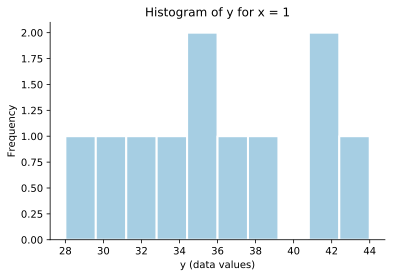

In [15]:
ax = sample_one['y'].plot.hist(y='y',
                               legend=False,
                               color=colour_1, edgecolor='white',
                               linewidth=2.0)
ax.set_xlabel('y (data values)')
ax.set_title('Histogram of y for x = 1')
for spine in 'right', 'top':
    ax.spines[spine].set_color(None)

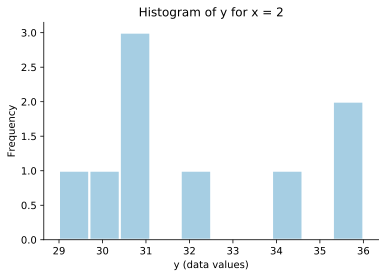

In [16]:
ax = sample_two['y'].plot.hist(y='y',
                               legend=False,
                               color=colour_1, edgecolor='white',
                               linewidth=2.0)
ax.set_xlabel('y (data values)')
ax.set_title('Histogram of y for x = 2')
for spine in 'right', 'top':
    ax.spines[spine].set_color(None)

In [17]:
# this code is almost good enough

In [18]:
if sample_one['y'].min( )< sample_two['y'].min():
    xlimlow = sample_one['y'].min()
else:
    xlimlow = sample_two['y'].min()

if sample_one['y'].max( )< sample_two['y'].max():
    xlimhigh = sample_one['y'].max()
else:
    xlimhigh = sample_two['y'].max()

In [19]:
# this code is the first attempt
# i need to figure out how to get the count for the tallest bar in either sample

In [20]:
if n_sample_one < n_sample_two:
    ylimhigh = n_sample_one
else:
    ylimhigh = n_sample_two

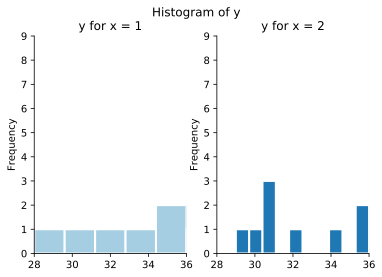

In [21]:
ax = plt.suptitle('Histogram of y')
ax1 = plt.subplot(121)
sample_one['y'].plot.hist(ax=ax1,
                          color=colour_1, edgecolor='white',
                          linewidth=2.0,
                          xlim=(xlimlow, xlimhigh), 
                          ylim=(0, ylimhigh),
                          title='y for x = 1')
ax2 = plt.subplot(122)
sample_two['y'].plot.hist(ax=ax2,
                          color=colour_2, edgecolor='white',
                          linewidth=2.0,
                          xlim=(xlimlow, xlimhigh),
                          ylim=(0, ylimhigh),
                          title='y for x = 2')
for spine in 'right', 'top':
    ax1.spines[spine].set_color(None)
    ax2.spines[spine].set_color(None)

x
1    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
2    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

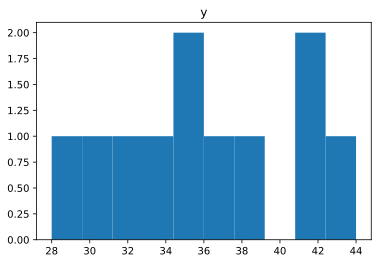

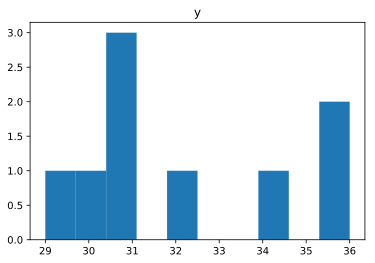

In [22]:
df.groupby('x').hist(column='y', grid=False)

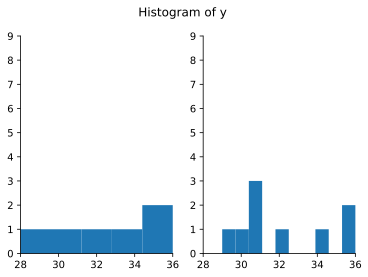

In [23]:
grid_size = (1, 2)
plt.suptitle('Histogram of y')
my_histo3 = plt.subplot2grid(grid_size, (0, 0))
my_histo3.hist(sample_one['y'])
my_histo3.set_ylim(0, ylimhigh)
my_histo3.set_xlim(xlimlow, xlimhigh)
for spine in 'right', 'top':
    my_histo3.spines[spine].set_color('none')
my_histo4 = plt.subplot2grid(grid_size, (0, 1))
my_histo4.hist(sample_two['y'])
my_histo4.set_ylim(0, ylimhigh)
my_histo4.set_xlim(xlimlow, xlimhigh)
for spine in 'right', 'top':
    my_histo4.spines[spine].set_color('none')

## Box plot ##

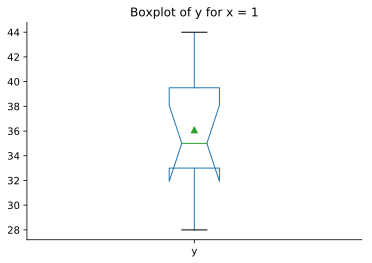

In [24]:
ax = sample_one['y'].plot.box(y='y', notch=True, showmeans=True)
ax.set_title('Boxplot of y for x = 1')
for spine in 'right', 'top':
    ax.spines[spine].set_color('none')

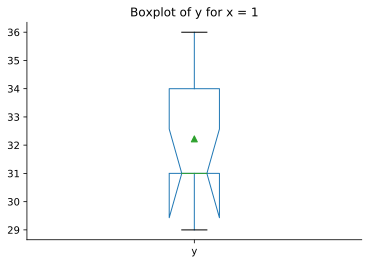

In [25]:
ax = sample_two['y'].plot.box(y='y', notch=True, showmeans=True)
ax.set_title('Boxplot of y for x = 1')
for spine in 'right', 'top':
    ax.spines[spine].set_color('none')

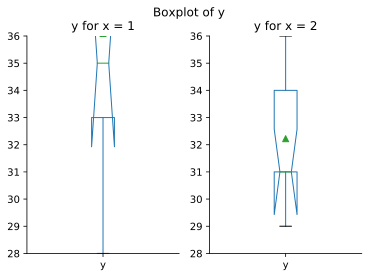

In [26]:
ax = plt.suptitle('Boxplot of y')
ax1 = plt.subplot(121)
sample_one['y'].plot.box(y='y', notch=True, showmeans=True, ax=ax1)
ax1.set_ylim(xlimlow, xlimhigh)
ax1.set_title('y for x = 1')
for spine in 'right', 'top':
    ax1.spines[spine].set_color('none')
ax2 = plt.subplot(122)
sample_two['y'].plot.box(y='y', notch=True, showmeans=True, ax=ax2)
ax2.set_ylim(xlimlow, xlimhigh)
ax2.set_title('y for x = 2')
for spine in 'right', 'top':
    ax2.spines[spine].set_color('none')

## Scatter plot ##

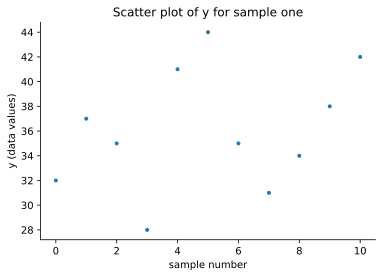

In [27]:
ax = sample_one['y'].plot(y='y', style='.', legend=False)
ax.set_xlabel('sample number')
ax.set_ylabel('y (data values)')
ax.set_title('Scatter plot of y for sample one')
for spine in 'right', 'top':
    ax.spines[spine].set_color('none')
ax.autoscale(tight=False)

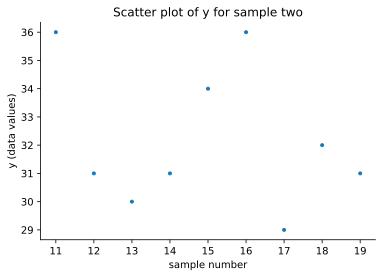

In [28]:
ax = sample_two['y'].plot(y='y', style='.', legend=False)
ax.set_xlabel('sample number')
ax.set_ylabel('y (data values)')
ax.set_title('Scatter plot of y for sample two')
for spine in 'right', 'top':
    ax.spines[spine].set_color('none')
ax.autoscale(tight=False)

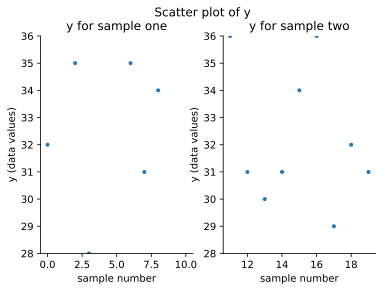

In [29]:
ax = plt.suptitle('Scatter plot of y')
ax1 = plt.subplot(121)
sample_one['y'].plot(y='y', style='.', legend=False, ax=ax1)
ax1.autoscale(tight=False)
ax1.set_ylim(xlimlow, xlimhigh)
ax1.set_title('y for sample one')
ax1.set_xlabel('sample number')
ax1.set_ylabel('y (data values)')
for spine in 'right', 'top':
    ax1.spines[spine].set_color('none')
ax2 = plt.subplot(122)
sample_two['y'].plot(y='y', style='.', legend=False, ax=ax2)
ax2.autoscale(tight=False)
ax2.set_ylim(xlimlow, xlimhigh)
ax2.set_title('y for sample two')
ax2.set_xlabel('sample number')
ax2.set_ylabel('y (data values)')
for spine in 'right', 'top':
    ax2.spines[spine].set_color('none')

## Normal probability plot ##

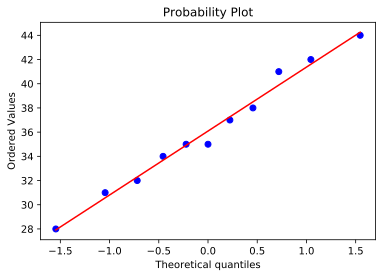

In [30]:
stats.probplot(sample_one['y'], dist=stats.norm, plot=plt);

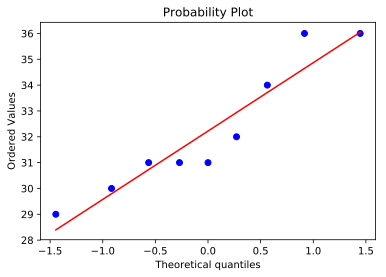

In [31]:
stats.probplot(sample_two['y'], dist=stats.norm, plot=plt);

<span style="color:red">**EDITOR NOTE**. Need to add code for this.

Using the results of the above normal plots, edit the values in the “range” in order to plot the two side-by-side with the same spread.

## Lack-of-fit tests ##

<span style="color:red">**EDITOR NOTE**. Use "one-sample t test" notebook to create content.</span>

# <a id='hypothesis-test-method'></a> Hypothesis test method #

The two-sample t test (Snedecor and Cochran 1989) is used to determine if two sample averages are different.

**Example**. Is the average of a new supplier different from the current supplier?

To test whether the average of one sample is different from another sample.

H<sub>o</sub>: $\overline{y}_1$ = $\overline{y}_2$<br />
H<sub>a</sub>: $\overline{y}_1$ ≠ $\overline{y}_2$<br />

## Variances of each sample are assumed to be equal ##

The calculated value is defined as:

$$
\begin{aligned}
    t_\text{calculated} & = \frac{\overline{y}_1-\overline{y}_2}
        {s_p \sqrt{\frac{1}{n_1} + \frac{1}{n_2}}} \\
    s_p & = \sqrt{\frac{(n_1 - 1)s^2_1 + (n_2 - 1)s^2_2}{n_1 + n_2 - 2}} \\
\end{aligned}
$$

The critical value is defined as:

$$
\begin{aligned}
    t_\text{critical} = t_{1- \alpha / 2 \, \text{,} \, \nu} \\
\end{aligned}
$$

where:

$$
\begin{align*}
    n_1                & = \text{the number of observations in sample 1} \\
    n_2                & = \text{the number of observations in sample 2} \\
    \overline{y}_1     & = \text{the average of sample 1} \\
    \overline{y}_2     & = \text{the average of sample 2} \\
    s^2_1              & = \text{the variance of sample 1} \\
    s^2_2              & = \text{the variance of sample 2} \\
    t_{1- \alpha / 2 \, \text{,} \, \nu} & = \text{the $100(1-\alpha/2)$ percentile of the t distribution with $\nu$ degrees of freedom} \\
    \nu                & = n_1 + n_2 - 2 \\
\end{align*}
$$

Reject H<sub>o</sub> if |t<sub>calculated</sub>| > t<sub>critical</sub>.

In [32]:
# assumes equal variances
n_one = len(sample_one['y'])
n_two = len(sample_two['y'])
average_one = np.mean(sample_one['y'])
average_two = np.mean(sample_two['y'])
delta_one_two = average_one - average_two
variance_one = np.var(sample_one['y'], ddof=1)
standard_deviation_one = np.std(sample_one['y'], ddof=1)
variance_two = np.var(sample_two['y'], ddof=1)
standard_deviation_two = np.std(sample_two['y'], ddof=1)
va = variance_one / n_one
vb = variance_two / n_two
vc = n_one + n_two - 2
ve = np.sqrt(1 / n_one + 1 / n_two)
t_critical_equal = stats.t.isf(significance_level / 2, vc)
standard_deviation_pooled = np.sqrt(((n_one - 1) * variance_one + 
                                     (n_two - 1) * variance_two) / 
                                      vc)
t_calculated_equal = (average_one - average_two) / \
                     (standard_deviation_pooled * ve)
p_value = stats.t.sf(np.abs(t_calculated_equal), vc) * 2
display_html('H<sub>o</sub>: average of sample 1 = '\
             'average of sample 2' + '<br />' +
             'H<sub>a</sub>: average of sample 1 ≠ '\
             'average of sample 2' + '<br />' +
             'average of sample 1 = ' + 
             str(average_one.round(3)) + '<br />' +
             'average of sample 2 = ' + 
             str(average_two.round(3)) + '<br />' +
             't<sub>calculated</sub> = ' + 
             str(t_calculated_equal.round(3)) + '<br />' +
             't<sub>critical</sub> = ' + 
             str(t_critical_equal.round(3)) + '<br />' +
             'p value for t<sub>calculated</sub> = ' + 
             str(p_value.round(3)), raw=True)
if abs(t_calculated_equal) > t_critical_equal:
    display_html('The average of sample 1 is ' +
                 'statistically, significantly different from ' +
                 'the average of sample 2, ' +
                 'because | t<sub>calculated</sub> | > '\
                 't<sub>critical</sub> .', raw=True)
else:
    display_html('The average of sample 1 is not ' +
                 'statistically, significantly different from ' +
                 'the average of sample 2, ' +
                 'because | t<sub>calculated</sub> | < '\
                 't<sub>critical</sub> .', raw=True)

H o : average of sample 1 = average of sample 2 H a : average of sample 1 ≠ average of sample 2 average of sample 1 = 36.091 average of sample 2 = 32.222 t calculated = 2.135 t critical = 2.101 p value for t calculated = 0.047

The average of sample 1 is statistically, significantly different from the average of sample 2, because | t calculated | > t critical .

## Variances of each sample are assumed to be unequal ##

The calculated value is defined as:

$$
\begin{aligned}
    t_\text{calculated} = \frac{\overline{y}_1-\overline{y}_2}
        {\sqrt{\frac{s^2_1}{n_1} + \frac{s^2_2}{n_2}}} \\
\end{aligned}
$$

The critical value is defined as:

$$
\begin{aligned}
    t_\text{critical} = t_{1- \alpha / 2 \, \text{,} \, \nu} \\
\end{aligned}
$$

where:

$$
\begin{align*}
    n_1                & = \text{the number of observations in sample 1} \\
    n_2                & = \text{the number of observations in sample 2} \\
    \overline{y}_1     & = \text{the average of sample 1} \\
    \overline{y}_2     & = \text{the average of sample 2} \\
    s^2_1              & = \text{the variance of sample 1} \\
    s^2_2              & = \text{the variance of sample 2} \\
    t_{1- \alpha / 2 \, \text{,} \, \nu} & = \text{the $100(1-\alpha/2)$ percentile of the t distribution with $\nu$ degrees of freedom} \\
    \nu                & = \frac{\left(\frac{s^2_1}{n_1} + \frac{s^2_2}{n_2}\right)^2}
        {\frac{\left(\frac{s^2_1}{n_1}\right)^2}{n_1-1} 
        + \frac{\left(\frac{s^2_2}{n_2}\right)^2}{n_2-1}} \\
\end{align*}
$$

Reject H<sub>o</sub> if |t<sub>calculated</sub>| > t<sub>critical</sub>.

In [33]:
# assumes unequal variances
t_calculated_unequal = (average_one - average_two) / \
                        np.sqrt(variance_one / n_one + \
                                variance_two / n_two)
vd = np.square(va + vb) / (np.square(va) / (n_one - 1) + \
                          (np.square(vb) / (n_two - 1)))
t_critical_unequal = stats.t.isf(significance_level / 2, vd)
p_value = stats.t.sf(np.abs(t_calculated_unequal), vd) * 2
display_html('H<sub>o</sub>: average of sample 1 = '\
             'average of sample 2' + '<br />' +
             'H<sub>a</sub>: average of sample 1 ≠ '\
             'average of sample 2' + '<br />' +
             'average of sample 1 = ' + 
             str(average_one.round(3)) + '<br />' +
             'average of sample 2 = ' + 
             str(average_two.round(3)) + '<br />' +
             't<sub>calculated</sub> = ' + 
             str(t_calculated_unequal.round(3)) + '<br />' +
             't<sub>critical</sub> = ' + 
             str(t_critical_unequal.round(3)) + '<br />' +
             'p value for t<sub>calculated</sub> = ' + 
             str(p_value.round(3)), raw=True)
if abs(t_calculated_unequal) > t_critical_unequal:
    display_html('The average of sample 1 is ' +
                 'statistically, significantly different from ' +
                 'the average of sample 2, ' +
                 'because | t<sub>calculated</sub> | > '\
                 't<sub>critical</sub> .', raw=True)
else:
    display_html('The average of sample 1 is not ' +
                 'statistically, significantly different from ' +
                 'the average of sample 2, ' +
                 'because | t<sub>calculated</sub> | < '\
                 't<sub>critical</sub> .', raw=True)

H o : average of sample 1 = average of sample 2 H a : average of sample 1 ≠ average of sample 2 average of sample 1 = 36.091 average of sample 2 = 32.222 t calculated = 2.269 t critical = 2.125 p value for t calculated = 0.038

The average of sample 1 is statistically, significantly different from the average of sample 2, because | t calculated | > t critical .

# <a id='confidence-interval-method'></a> Confidence interval method #

For a given confidence interval of an average of a sample, if many samples are collected and the confidence interval is calculated for each sample, in the long run about 95 % of these intervals would contain the true average.

The two-sample t test (Snedecor and Cochran 1989) is used to determine if the difference between the averages of two samples is not equal to zero.

The hypotheses are:

H<sub>o</sub>: |$\overline{y}_1$ - $\overline{y}_2$| = 0<br />
H<sub>a</sub>: |$\overline{y}_1$ - $\overline{y}_2$| ≠ 0

## Variances are assumed to be equal  ##

### n<sub>1</sub> < 30 or n<sub>2</sub> < 30 ###

The confidence limits are defined as:

$$
\begin{aligned}
    (\overline{y}_1 - \overline{y}_2) \pm t_{1- \alpha / 2 \, \text{,} \, \nu} \times
        s_p \sqrt{\frac{1}{n_1} + \frac{1}{n_2}} \\
\end{aligned}
$$

where:

$$
\begin{align*}
    s_p & = \text{the pooled standard deviation} \\
        & = \sqrt{\frac{(n_1 - 1)s^2_1 + (n_2 - 1)s^2_2}{n_1 + n_2 - 2}} \\
    n_1                & = \text{the number of observations in sample 1} \\
    n_2                & = \text{the number of observations in sample 2} \\
    \overline{y}_1     & = \text{the average of sample 1} \\
    \overline{y}_2     & = \text{the average of sample 2} \\
    s^2_1              & = \text{the variance of sample 1} \\
    s^2_2              & = \text{the variance of sample 2} \\
    t_{1- \alpha / 2 \, \text{,} \, n-1} & = \text{the $100(1-\alpha/2)$ percentile of the t distribution with $n-1$ degrees of freedom} \\
    \nu                         & = n_1 + n_2 - 2 \\
    \alpha                      & = \text{the desired significance level}
\end{align*}
$$

Reject H<sub>o</sub> if 0 is not within the confidence interval.

In [34]:
n_one = len(sample_one['y'])
n_two = len(sample_two['y'])
average_one = np.mean(sample_one['y'])
average_two = np.mean(sample_two['y'])
delta_one_two = average_one - average_two
variance_one = np.var(sample_one['y'], ddof=1)
standard_deviation_one = np.std(sample_one['y'], ddof=1)
variance_two = np.var(sample_two['y'], ddof=1)
standard_deviation_two = np.std(sample_two['y'], ddof=1)
va = variance_one / n_one
vb = variance_two / n_two
vc = n_one + n_two - 2
ve = np.sqrt(1 / n_one + 1 / n_two)
t_critical_equal = stats.t.isf(significance_level / 2, vc)
standard_deviation_pooled = np.sqrt(((n_one - 1) * variance_one + \
                                     (n_two - 1) * variance_two) / \
                                      vc)

In [35]:
lower_limit = delta_one_two - t_critical_equal * \
              standard_deviation_pooled * ve
upper_limit = delta_one_two + t_critical_equal * \
              standard_deviation_pooled * ve
if 0 < lower_limit or 0 > upper_limit:
    display_html('The two averages are statistically, '\
                 'significantly different ' \
                 'because 0 is not contained within the '\
                 'confidence interval ' + \
                 '(' + str(lower_limit.round(3)) + ', ' + 
                 str(upper_limit.round(3)) + ')' \
                 ' of the difference ' + 
                 str(delta_one_two.round(3)) + '.', raw=True)
else:
    display_html('The two averages are not statistically, '\
                 'significantly different ' \
                 'because 0 is contained within the '\
                 'confidence interval ' + \
                 '(' + str(lower_limit.round(3)) + ', ' + 
                 str(upper_limit.round(3)) + ')' \
                 ' of the difference ' + 
                 str(delta_one_two.round(3)) + '.', raw=True)

The two averages are statistically, significantly different because 0 is not contained within the confidence interval (0.062, 7.675) of the difference 3.869.

## Variances are assumed to be unequal ##

<span style="color:red">**EDITOR NOTE**. Use "one-sample t test" notebook to create content. Is there such a scenario? What does Minitab do?</span>

# <a id='references'></a> References #

- [Snedecor, George W., and William G. Cochran. 1989. *Statistical Methods*. Eighth Edition. Iowa State University Press](http://www.amazon.com/Statistical-Methods-George-W-Snedecor/dp/0813815614)
- [Minitab. “Hospital comparison data.”](http://support.minitab.com/en-us/datasets/basic-statistics-data-sets/hospital-comparison-data/)
- [NIST. Engineering Statistics Handbook.](http://www.itl.nist.gov/div898/handbook/eda/section3/eda353.htm)
- [Wikipedia. “Confidence interval.”](https://en.wikipedia.org/wiki/Confidence_interval)
- [Wikipedia. “Two-sample t-test”](https://en.wikipedia.org/wiki/Student%27s_t-test#Independent_two-sample_t-test)
- [Wikipedia. “Normal probability plot.”](https://en.wikipedia.org/wiki/Normal_probability_plot)

# <a id='support'></a> Support #

## Python librairies ##

- [matplotlib](https://github.com/matplotlib/matplotlib)
- [numpy](https://github.com/numpy/numpy)
- [pandas](https://github.com/pydata/pandas)
- [scipy](https://github.com/scipy/scipy)

<span style="color:red">**EDITOR NOTE**. Cold I use statsmodels?

## Enhancements ##

- Code to check the assumptions, for example, test for equal variances.
- Two-sample t test one-sided.
    - $\overline{y}_1 > \overline{y}_2$
    - $\overline{y}_1 < \overline{y}_2$
- Two-sample t test two-sided, confidence interval method, variances equal, n<sub>1</sub> > 30 and n<sub>2</sub> > 30, using:

$$
\begin{aligned}
    (\overline{y}_1 - \overline{y}_2) \pm z \times
        s_p \sqrt{\frac{1}{n_1} + \frac{1}{n_2}} \\
\end{aligned}
$$

- Two-sample t test two-sided, confidence interval method, variances unequal, n<sub>1</sub> < 30 or n<sub>2</sub> < 30, using:
- Two-sample t test two-sided, confidence interval method, variances unequal, n<sub>1</sub> > 30 and n<sub>2</sub> > 30, using:
- Two-sample t test for difference of a certain size.
- Add more description to the graphical analyses.

## Data sets ##

These data sets were used to test this notebook. They can also be used as examples for further study.

- [Minitab. “Hospital comparison data.”](minitab_hospital_comparison.csv)
- [NIST. AUTO83B.DAT. “Miles per US gallon, US v. Japan, cars.”](nist_us_japan_car_mpg.csv)

# Colophon #

<a href="mailto:gillespilon13@gmail.com">Gilles Pilon</a>.